In [34]:
pip install seaborn

     |████████████████████████████████| 285 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Import libraies for readingn the data set
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# First checking how many worksheets are present inside the excel Files
spreadsheet_file = pd.ExcelFile('Data Science task-supporting Films data_0420.xlsx')

In [4]:
worksheets = spreadsheet_file.sheet_names

In [5]:
print('All the Worksheets present', worksheets)

All the Worksheets present ['Questions', 'Profiles', 'Merged_data', 'Sheet2', 'Sheet1', 'FILM Data']


In [6]:
#Path of the file to read
excel_file_path = 'Data Science task-supporting Films data_0420.xlsx'

In [7]:
# read the file into a variable into a variable df -- dataframe
df = pd.read_excel(excel_file_path, sheet_name='Merged_data')

In [10]:
print(df)

       record_id question_code            answer Profiles.date_submitted  \
0          10967       FILM006     None of These              2018-04-04   
1          16972       FILM006     None of These              2018-07-13   
2          10967       FILM004      Peter Rabbit              2018-04-04   
3          16972       FILM004  Fantastic Beasts              2018-07-13   
4          16973       FILM006     None of These              2018-07-13   
...          ...           ...               ...                     ...   
84800      85150       FILM003       Toy Story 4              2019-07-03   
84801      85153       FILM003       Toy Story 4              2019-07-03   
84802      85168       FILM003       Toy Story 4              2019-07-04   
84803      85171       FILM003       Toy Story 4              2019-07-04   
84804      85273       FILM003       Toy Story 4              2019-07-04   

       Profiles.age Profiles.gender         Profiles.location  \
0                 4   

In [23]:
# Sorting data into ascending order by the record id's
df.sort_values(by=['record_id'])

,record_id,question_code,answer,Profiles.date_submitted,Profiles.age,Profiles.gender,Profiles.location,Questions.question_text,Questions.question_type
81080,10966,FILM003,Peter Rabbit,2018-04-03,5,Boy,North West,What films have you watched at the cinema rece...,MULTI
53658,10966,FILM003,Jumanji,2018-04-03,5,Boy,North West,What films have you watched at the cinema rece...,MULTI
33092,10966,FILM006,Video Games,2018-04-03,5,Boy,North West,"Have you bought any of the following, which re...",MULTI
77944,10966,FILM003,The LEGO Batman Movie,2018-04-03,5,Boy,North West,What films have you watched at the cinema rece...,MULTI
46767,10966,FILM006,DVDs,2018-04-03,5,Boy,North West,"Have you bought any of the following, which re...",MULTI
...,...,...,...,...,...,...,...,...,...
19608,175592,FILM004,Paw Patrol,2020-03-30,10,Girl,North West,What new films are you looking forward to?,FREE
39671,175592,FILM006,Toys,2020-03-30,10,Girl,North West,"Have you bought any of the following, which re...",MULTI
65394,175592,FILM003,Sonic the Hedgehog,2020-03-30,10,Girl,North West,What films have you watched at the cinema rece...,MULTI
19170,175593,FILM004,Pokémon,2020-03-30,10,Boy,London,What new films are you looking forward to?,FREE


In [10]:
# Plotting Line char

list(df.columns)

['record_id',
 'question_code',
 'answer',
 'Profiles.date_submitted',
 'Profiles.age',
 'Profiles.gender',
 'Profiles.location',
 'Questions.question_text',
 'Questions.question_type']

Text(0.5, 0, 'Date')

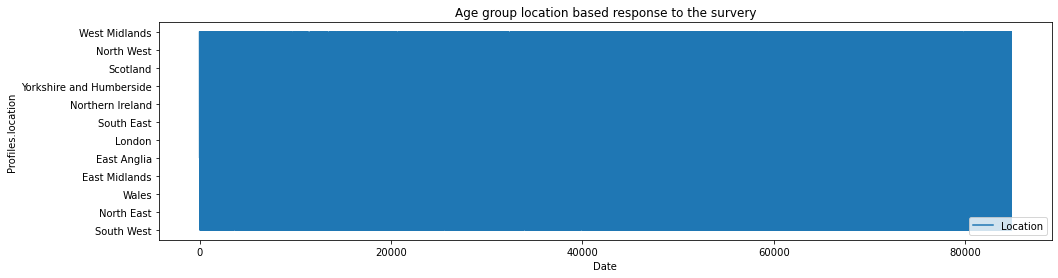

In [13]:
# Now we will plot lines based on the two columns

# Setting the width and height of the figure
plt.figure(figsize=(16,4))

# Add Title
plt.title("Location with highest number of response")

# Line chart showinng the daily response of questions
sns.lineplot(data=df['Profiles.location'], label='Location')

# Line chart showing the dates it happened
#sns.lineplot(data=df['Profiles.age'], label='Location')

# Adding label to the horizontal axis
plt.xlabel("Date")



TypeError: Horizontal orientation requires numeric `x` variable.

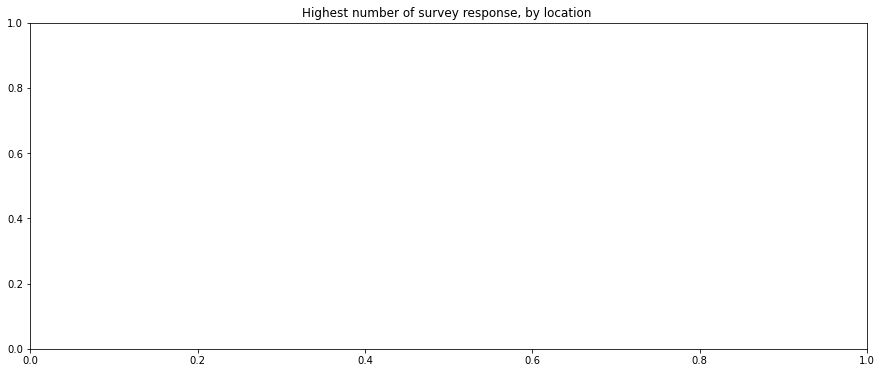

In [15]:
# Now we will plot a bar chart for the highest location response

# Setting the width and height of the figure
plt.figure(figsize=(15,6))

# Add Title
plt.title("Highest number of survey response, by location ")

# bar chart showinng the response from the location  
sns.barplot(x=df['Profiles.location']   )


# Adding label to the vertical axis
plt.ylabel("Number of responses")

# Adding label to the horizontal axis
plt.ylabel("Location")


In [16]:
df.describe()

,record_id,Profiles.age
count,84805.000000,84805.000000
mean,73981.219869,10.668475
std,51383.022307,4.373912
min,10966.000000,3.000000
25%,25841.000000,7.000000
50%,53001.000000,11.000000
75%,119766.000000,14.000000
max,175593.000000,18.000000


ValueError: could not convert string to float: 'FILM006'

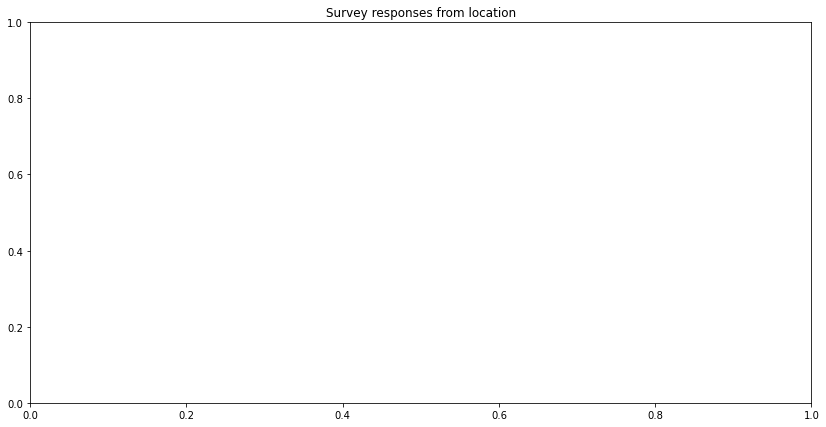

In [18]:
# Creating Heat Map
plt.figure(figsize=(14,7))

plt.title("Survey responses from location")

sns.heatmap(data=df,annot=True)

plt.xlabel("Month")

In [36]:
# Creating Columns for Age groups

def age_group(age):

    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    global bucket

    # Convert to an int, in case the data is read in as an "object" (aka string)
    age = int(age)
    
    # Age 3 to 9 ('range' excludes upper bound)
    if age in range(3, 9):
        bucket = '3-9'

    if age in range(10, 18):
        bucket = '10-18'
        
    return bucket 

In [37]:
df['age_group'] = df['Profiles.age'].apply(age_group)

In [40]:
df.head()

,record_id,question_code,answer,Profiles.date_submitted,Profiles.age,Profiles.gender,Profiles.location,Questions.question_text,Questions.question_type,age_group
0,10967,FILM006,None of These,2018-04-04,4,Boy,West Midlands,"Have you bought any of the following, which re...",MULTI,3-9
1,16972,FILM006,None of These,2018-07-13,12,Boy,North West,"Have you bought any of the following, which re...",MULTI,10-18
2,10967,FILM004,Peter Rabbit,2018-04-04,4,Boy,West Midlands,What new films are you looking forward to?,FREE,3-9
3,16972,FILM004,Fantastic Beasts,2018-07-13,12,Boy,North West,What new films are you looking forward to?,FREE,10-18
4,16973,FILM006,None of These,2018-07-13,10,Girl,Scotland,"Have you bought any of the following, which re...",MULTI,10-18


In [41]:
df['age_group'].head()

0      3-9
1    10-18
2      3-9
3    10-18
4    10-18
Name: age_group, dtype: object

In [42]:
# Subset the columns from when the question "What was the most..." is asked, 


df.iloc[:5, 3:7]

,Profiles.date_submitted,Profiles.age,Profiles.gender,Profiles.location
0,2018-04-04,4,Boy,West Midlands
1,2018-07-13,12,Boy,North West
2,2018-04-04,4,Boy,West Midlands
3,2018-07-13,12,Boy,North West
4,2018-07-13,10,Girl,Scotland


In [43]:
# Next, assign it to a separate variable corresponding to your question
important_consideration = df.iloc[:, 3:7]

In [ ]:
def rename_columns(df, new_names_list):

    """Takes a DataFrame that needs to be renamed and a list of the new
    column names, and returns the renamed DataFrame. Make sure the 
    number of columns in the df matches the list length exactly,
    or function will not work as intended."""

    rename_dict = dict(zip(df.columns, new_names_list))
    df = df.rename(mapper=rename_dict, axis=1)

    return df
